# Problem 3:

Use the curve factory function to bootstrap the bonds from the example in class and from problem set #1, and confirm that the earlier constructions were correct. Now, explore the relationship between the implied yield curve and the market and contractual characteristics of the bonds. Start by perturbing the bond prices. Try increasing and decreasing all of the bond prices together in increments of 5% of the face value. Then try perturbing only the long maturity bond prices, leaving the short maturity bonds fixed. Do the same holding the long bonds constant. Then, try adjusting the coupons of the bonds in a similar investigation. In all of these experiments, observe the effect on the rates numerically using the get rates method, and also plot the yield curve using the plotting methods, to help understand the effect these factors have on the yield curve.

In [1]:
import fixedincome as fi
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

### Part 1: Get yield curves from different bonds (from market)

In [2]:
bond1 = fi.bond_factory(dates=[0.5], rates=[1000])
bond1.set_price(985)
bond2 = fi.create_coupon_bond(maturity=1.0, face=10000, rate=5, frequency=2)
bond2.set_price(10124)
bond3 = fi.create_coupon_bond(maturity=2.0, face=10000, rate=7, frequency=2)
bond3.set_price(10507)

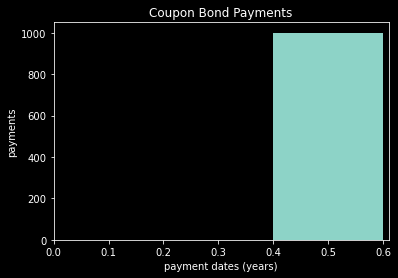

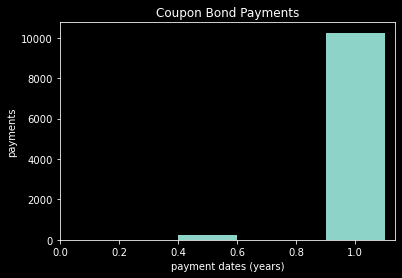

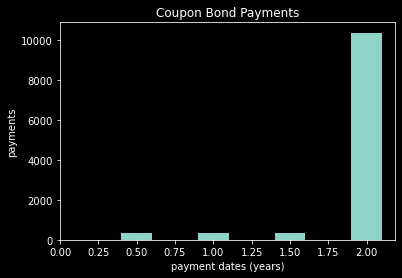

In [3]:
bond1.plot_payments()
bond2.plot_payments()
bond3.plot_payments()

In [4]:
bonds = [bond1, bond2, bond3]
yc = fi.curve_factory(bondlist=bonds)

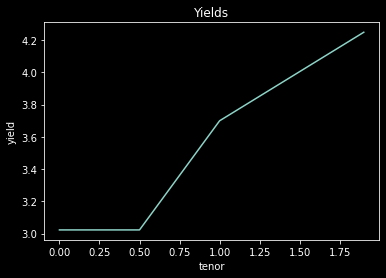

In [5]:
yc.plot_yields()

### Part 2: Calculate Yield curve 

In [6]:
bond11 = fi.bond_factory(dates=[0.5], rates=[10000])
bond11.set_price(9910)
bond12 = fi.create_coupon_bond(maturity=1.0, face=10000, rate=7, frequency=2)
bond12.set_price(10050)
bond13 = fi.create_coupon_bond(maturity=1.5, face=50000, rate=4, frequency=2)
bond13.set_price(46500)
bond14 = fi.create_coupon_bond(maturity=2.0, face=100000, rate=5, frequency=2)
bond14.set_price(96500)
bond15 = fi.create_coupon_bond(maturity=2.5, face=100000, rate=7, frequency=2)
bond15.set_price(98000)

In [7]:
bonds = [bond11, bond12, bond13, bond14, bond15]
yc1 = fi.curve_factory(bondlist=bonds)

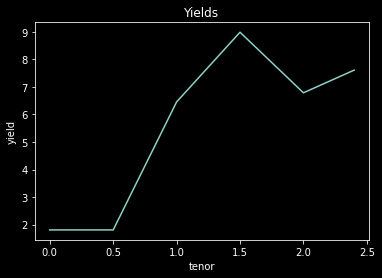

In [8]:
yc1.plot_yields()

__Comments:__ This is the same curve built in problem set # 1, although the interpolation algorithm used in the code is somewhat different, for this example the results will be the same. The non-monotonicty seen in the curve, ie the local minimum at the 2 year point, is an example of a yield curve inversion. An inverted yield curve is not a normal event, though it certainly happens, and is often a worrying sign for economic conditions. If you see an yield curve inversion like this when building a curve, it should give you pause, and you should be especially wary of your inputs. It could, for instance, indicate bad price data, and you should be especially careful. In this case, given the prices of the calibration instruments, the result is correct as the same result was derived when working the problem by hand in problem set # 1.

In [9]:
bond1.price(yc)

985.0

In [10]:
bond2.price(yc)

10124.000000000256

In [11]:
bond3.price(yc)

10506.999999999998

In [12]:
bond11.price(yc1)

9910.0

In [13]:
bond12.price(yc1)

10050.0

In [14]:
bond13.price(yc1)

46500.0

In [15]:
bond14.price(yc1)

96499.99999999999

In [16]:
bond15.price(yc1)

98000.0

__Comments:__ All the prices check out, and we have correctly reproduced the prices of our calibration instruments
for both yield curves

### Part 3: Change market price of bonds to understand impact on Yield curve

In [17]:
bond11.set_price(10500)
bond12.set_price(10500)
bond13.set_price(50000)
bond14.set_price(101000)
bond15.set_price(103000)

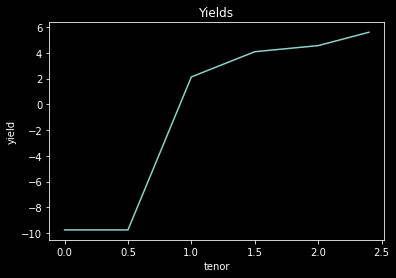

In [18]:
yc2 = fi.curve_factory(bondlist=bonds)
yc2.plot_yields()

__Comments:__ Here we have essentially raised all the bond prices by a near constant increment. As a result, the implied yield curve has smaller yields (greater price implies less discounting which in turn implies lower rates). Why is the 6 month implied rate negative? Consider the 6 month bond and its price. It is a zero coupon bond with a 10,000 face value, but we have built this yield curve assuming it is trading at 10,500, even more than its face value, which is the only payment it makes. The only way to discount a payment and get an even larger monetary value than the payment being discounted is with a negative interest rate. Since we don’t want to consider negative interest rates, from now on we will cap the price of this bond at $10,000. It should be noted, however, that there are no inversions in this curve so that, from some points of view, this might be a more
reasonable or normal yield curve.

In [19]:
bond11.set_price(10000)
bond12.set_price(11000)
bond13.set_price(53000)
bond14.set_price(106000)
bond15.set_price(108000)

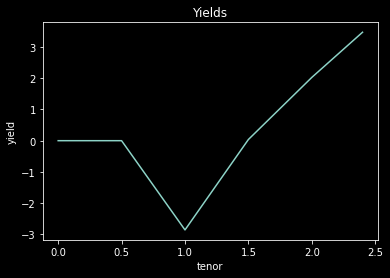

In [20]:
yc3 = fi.curve_factory(bondlist=bonds)
yc3.plot_yields()

__Comments:__ Since the first bond, a zero coupon bond, is now trading at par, this implies a discount factor of 1, or equivalently, the 6 month rate is 0. With a market price of 11,000 for the second bond, which has a 10,000 face value and pays only 2 coupons of 700 the price of $11,000 is greater than the sum of the values of all payments, even without discounting, so this implies a negative 1 year rate.

In [21]:
bond11.set_price(9500)
bond12.set_price(9700)
bond13.set_price(45600)
bond14.set_price(96500)
bond15.set_price(98000)

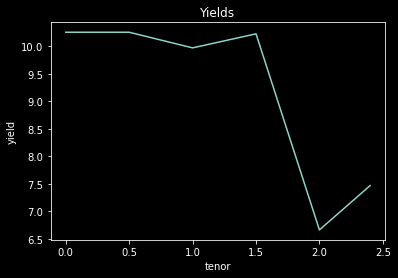

In [22]:
yc4 = fi.curve_factory(bondlist=bonds)
yc4.plot_yields()

__Comments:__ The multiple inversions in this yield curve suggest that this realization of prices may not be the most realistic. There is massive discounting at the front end necessary because of how low the prices of the shorter maturity bonds are. Because of the significantly less distressed longer maturity bonds, the curve must compensate for this at the long end with significantly reduced rates.

In [23]:
bond11.set_price(9910)
bond12.set_price(10500)
bond13.set_price(46500)
bond14.set_price(100000)
bond15.set_price(103000)

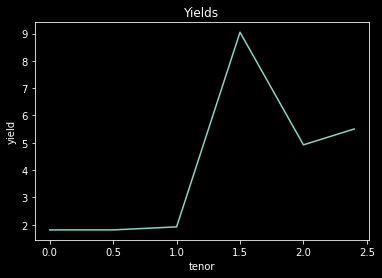

In [24]:
yc5 = fi.curve_factory(bondlist=bonds)
yc5.plot_yields()

__Comments:__ We see similar phenomena here to what we observed in the previous figure. The shorter maturity bonds have been restored to their original price levels, but we have also raised the prices of the longer bonds, implying much less discounting for the longer tenors, and thus we get the inversion. The plot seems to suggest that the 1.5 year bond, with a considerably discounted price at 46,500 may be a major reason for the strange looking yield curve, so we will see what happens
when we push the price of that bond up:

In [25]:
bond11.set_price(9910)
bond12.set_price(10500)
bond13.set_price(49000)
bond14.set_price(100000)
bond15.set_price(103000)

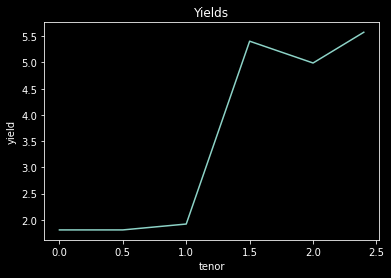

In [26]:
yc6 = fi.curve_factory(bondlist=bonds)
yc6.plot_yields()

__Comments:__ We seem to have a more reasonable looking yield curve now, but there is still an inversion, so we’ll try pushing the price of the middle bond up a bit more:

In [27]:
bond11.set_price(9910)
bond12.set_price(10500)
bond13.set_price(51000)
bond14.set_price(100000)
bond15.set_price(103000)

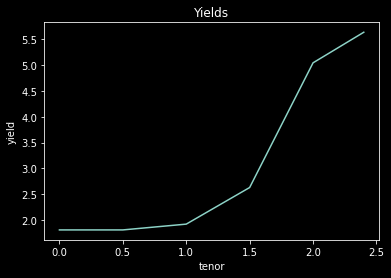

In [28]:
yc7 = fi.curve_factory(bondlist=bonds)
yc7.plot_yields()

__Comments:__ That seems to have done the trick. There are no inversions in this curve, suggesting that this might be a more reasonable distribution of prices for these bonds.

If instead of adjusting the prices we alter the coupons of the bonds we can predict what the effects should be, in light of the observations we just made. The effects will be similar, but in the opposite direction. Raising the value of the coupons, while keeping the bond prices constant, will force the discounting to be stronger, and thus will raise the interest rates. For instance, leaving all the bond prices the same as our original assumptions, but just raising the coupons will cause the long end of the yield curve to adjust up, whereas lowering them will reduce long term rates, and may ultimately lead to another inverted yield curve.

In [29]:
bond11 = fi.bond_factory(dates=[0.5], rates=[10000])
bond11.set_price(9910)
bond12 = fi.create_coupon_bond(maturity=1.0, face=10000, rate=7, frequency=2)
bond12.set_price(10050)
bond13 = fi.create_coupon_bond(maturity=1.5, face=50000, rate=4, frequency=2)
bond13.set_price(46500)
bond14 = fi.create_coupon_bond(maturity=2.0, face=100000, rate=8, frequency=2)
bond14.set_price(96500)
bond15 = fi.create_coupon_bond(maturity=2.5, face=100000, rate=11, frequency=2)
bond15.set_price(92000)
bonds = [bond11, bond12, bond13, bond14, bond15]

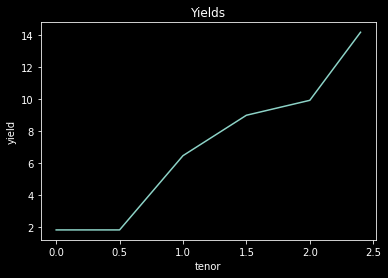

In [30]:
yc8 = fi.curve_factory(bondlist=bonds)
yc8.plot_yields()

In [31]:
bond14 = fi.create_coupon_bond(maturity=2.0, face=100000, rate=2, frequency=2)
bond14.set_price(96500)
bond15 = fi.create_coupon_bond(maturity=2.5, face=100000, rate=5, frequency=2)
bond15.set_price(98000)
bonds = [bond11, bond12, bond13, bond14, bond15]

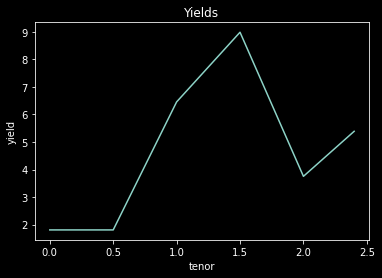

In [32]:
yc9 = fi.curve_factory(bondlist=bonds)
yc9.plot_yields()

__Comments:__ One can continue to experiment this way, adjusting the prices, coupon, maturities, payment frequencies, and see the effect this has on the implied yield curves, and students should carry out experiments like this in order to build intuition about bonds and yield curves.